In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd


In [2]:
cityData = pd.read_csv("Resources/city_data.csv")
rideData = pd.read_csv("Resources/ride_data.csv")


In [3]:
cityData.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
rideData.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
cityData.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
cityData.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
rideData.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [8]:
rideData.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [9]:
cityData.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [10]:
cityData.sum()["driver_count"]

2973

In [11]:
for cityType in cityData["type"].unique():
    numT = sum(cityData["type"] == cityType)
    print(f"{cityType} = {numT}")

Urban = 66
Suburban = 36
Rural = 18


In [12]:
rideData.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
pyberData = pd.merge(rideData, cityData, how = "left", on = ["city","city"])

pyberData.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [19]:
urbanCities = pyberData[pyberData["type"] == "Urban"]
suburbanCities = pyberData[pyberData["type"] == "Suburban"]
ruralCities =  pyberData[pyberData["type"] == "Rural"]


In [21]:
urbanRides = urbanCities.groupby(["city"]).count()["ride_id"]
suburbanRides = suburbanCities.groupby(["city"]).count()["ride_id"]
ruralRides = ruralCities.groupby(["city"]).count()["ride_id"]


In [24]:
urbanAvgFare = urbanCities.groupby(["city"]).mean()["fare"]
suburbanAvgFare = suburbanCities.groupby(["city"]).mean()["fare"]
ruralAvgFare = ruralCities.groupby(["city"]).mean()["fare"]

In [35]:
urbanDrivers = urbanCities.groupby(["city"]).mean()["driver_count"]
suburbanDrivers = suburbanCities.groupby(["city"]).mean()["driver_count"]
ruralDrivers = ruralCities.groupby(["city"]).mean()["driver_count"]


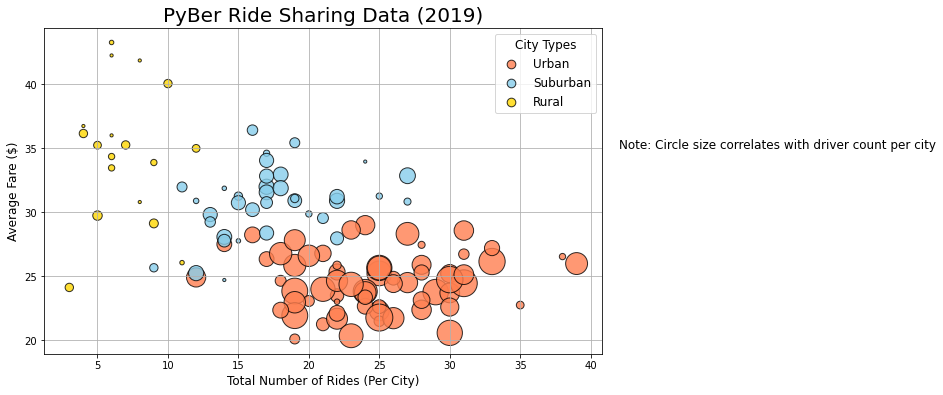

<Figure size 432x288 with 0 Axes>

In [51]:
plt.subplots(figsize = (10, 6))

plt.scatter(urbanRides,urbanAvgFare, s = 10*urbanDrivers, color = "coral", alpha = .8, edgecolor = "black", 
            linewidths = 1, label = "Urban")

plt.scatter(suburbanRides,suburbanAvgFare, s = 10*suburbanDrivers, color = "skyblue", alpha = .8, edgecolor = "black", 
            linewidths = 1, label = "Suburban")


plt.scatter(ruralRides,ruralAvgFare, s = 10*ruralDrivers, color = "gold", alpha = .8, edgecolor = "black", 
            linewidths = 1, label = "Rural")


plt.title("PyBer Ride Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.xlabel("Total Number of Rides (Per City)", fontsize =12)
plt.grid()
lgnd = plt.legend(fontsize = 12, mode = "Expanded", scatterpoints = 1, loc = "best", title = "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(42,35, "Note: Circle size correlates with driver count per city", fontsize = 12)

plt.show()

plt.savefig("analysis/Fig1.png")